# Contents
- [Data](#data)
- [Logistic Regression Model](#log_reg)
    - [Single Feature](#mod_1)
    - [Two-Feature](#mod_2)
- [Modeling](#model)
    - [Train/Test Split](#tt_splt)
    - [Initial Model](#init)
- [Tuning](#tune)
    - [GridSearch](#grid)
- [Feature Weights](#feat_wgt)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Custom Functions

## Feature Weight Sorting

In [2]:
def feat_sort(values, labels, ret_num='all'):
    '''
    Return dataframe of sorted (by absolute value) feature weights
    values : feature weight values from analysis
    labels : names of each feature
    ret_num : number of top features to return
    '''
    
    df = pd.DataFrame(values, index=labels, columns=['feat_wgt'])
    # drop weights = 0
    df = df[df['feat_wgt'] != 0]
    # note which weights are positive
    df['positive'] = df['feat_wgt'] > 0
    # take absolute value of weights
    df['feat_wgt'] = df['feat_wgt'].apply(abs)
    # sort weights (largest to smalles)
    df.sort_values(by='feat_wgt', ascending=False, inplace=True)
    if ret_num == 'all':
        return(df)
    else:
        return(df.iloc[:ret_num, :])

# Data <a name="data"></a>

## Load Data

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['cancer'] = data['target']

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Define Variables

In [7]:
# define predictor variables (features)
X = df.iloc[:, :-1]
# define dependent variable (target)
y = df.iloc[:, -1]

## Single Feature

In [8]:
# create single feature dataframe
df_1 = df[['mean radius', 'cancer']].copy()

In [9]:
df_1.head()

,mean radius,cancer
0,17.99,0
1,20.57,0
2,19.69,0
3,11.42,0
4,20.29,0


### Define Variables

In [10]:
# define predictor variables (features)
X_1 = df_1.iloc[:, :-1]
# define dependent variable (target)
y_1 = df_1.iloc[:, -1]

### Plot

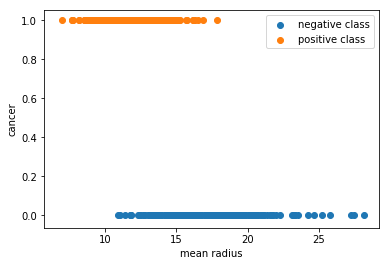

In [11]:
plt.scatter(X_1.iloc[y_1[y_1 == 0].index, :], y_1[y_1 == 0], label='negative class')
plt.scatter(X_1.iloc[y_1[y_1 == 1].index, :], y_1[y_1 == 1], label='positive class')
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend();

## Two-Feature

In [12]:
# create two-feature dataframe
df_2 = df[['mean radius', 'mean texture', 'cancer']].copy()

In [13]:
df_2.head()

,mean radius,mean texture,cancer
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0


### Define Variables

In [14]:
# define predictor variables (features)
X_2 = df_2.iloc[:, :-1]
# define dependent variable (target)
y_2 = df_2.iloc[:, -1]

### Plot

In [15]:
from mpl_toolkits import mplot3d

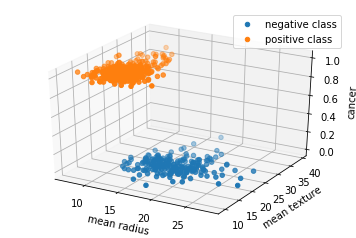

In [16]:
# uncomment for interactivity:
# %matplotlib notebook

ax = plt.axes(projection='3d')
ax.scatter3D(X_2.iloc[y_2[y_2 == 0].index, 0], X_2.iloc[y_2[y_2 == 0].index, 1], y_2[y_2 == 0], 
             label='negative class')
ax.scatter3D(X_2.iloc[y_2[y_2 == 1].index, 0], X_2.iloc[y_2[y_2 == 1].index, 1], y_2[y_2 == 1], 
             label='positive class')
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df_2.columns[-1])
ax.legend();

In [17]:
%matplotlib inline

# Logistic Regression Model <a name="log_reg"></a>
Model overview for simple cases

In [18]:
from sklearn.linear_model import LogisticRegression

## Single Feature Model <a name="mod_1"></a>

In [19]:
# create instance of model
log_reg = LogisticRegression()

In [20]:
# fit model on training data
log_reg.fit(X_1, y_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model Coefficients

In [21]:
# output model coefficients
log_reg.coef_

array([[-0.54291739]])

In [22]:
# output model intercept
log_reg.intercept_

array([8.19393897])

In [23]:
# output model classes
log_reg.classes_

array([0, 1])

In [24]:
# features
X_1.columns

Index(['mean radius'], dtype='object')

In [25]:
coefs = [log_reg.intercept_[0], log_reg.coef_[0][0]]

In [26]:
feats = ['intercept', X_1.columns[0]]

In [27]:
pd.DataFrame(coefs, index=feats, columns=['Model Coefficients'])

,Model Coefficients
intercept,8.193939
mean radius,-0.542917


### Model Equation

In [28]:
print('Regression Model Equation')
print('-'*80)
print(f'y = {round(log_reg.coef_[0][0], 4)}*{X_1.columns[0]} \
+ {round(log_reg.intercept_[0], 2)}')
print('-'*80)

Regression Model Equation
--------------------------------------------------------------------------------
y = -0.5429*mean radius + 8.19
--------------------------------------------------------------------------------


### Model Visualization

In [29]:
# calculate model values with logistic regression equation
x_mod = np.linspace(min(X_1.iloc[:, 0]), max(X_1.iloc[:, 0]))
y_mod = 1 / (1 + np.exp(-(log_reg.coef_[0][0]*x_mod + log_reg.intercept_[0])))

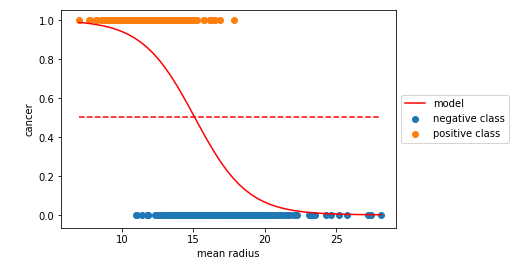

In [30]:
plt.scatter(X_1.iloc[y_1[y_1 == 0].index, :], y_1[y_1 == 0], label='negative class')
plt.scatter(X_1.iloc[y_1[y_1 == 1].index, :], y_1[y_1 == 1], label='positive class')
plt.plot(x_mod, y_mod, c='r', label='model')
plt.plot(x_mod, [0.5]*len(x_mod), c='r', linestyle='--')
plt.annotate('probability threshold', xy=(1, 0.5), xytext=(1, 0.7),
            arrowprops=dict(facecolor='red'))
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Model Predictions

In [31]:
# predict class based on feature input
predictions = log_reg.predict(X_1)
predictions

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [32]:
# predict probabilities of each class based on feature input
predict_proba = log_reg.predict_proba(X_1)
predict_proba

array([[0.82823148, 0.17176852],
       [0.95137969, 0.04862031],
       [0.92386828, 0.07613172],
       ...,
       [0.69391566, 0.30608434],
       [0.95212757, 0.04787243],
       [0.01832669, 0.98167331]])

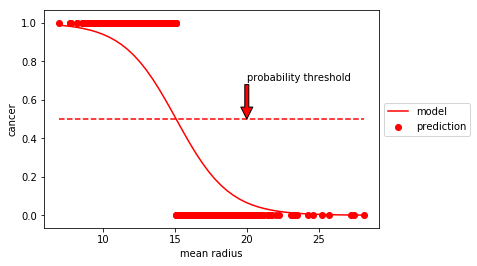

In [33]:
plt.scatter(X_1, predictions, c='r', label='prediction')
plt.plot(x_mod, y_mod, c='r', label='model')
plt.plot(x_mod, [0.5]*len(x_mod), c='r', linestyle='--')
plt.annotate('probability threshold', xy=(20, 0.5), xytext=(20, 0.7),
            arrowprops=dict(facecolor='red'))
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### Model Evaluation

In [34]:
from sklearn import metrics

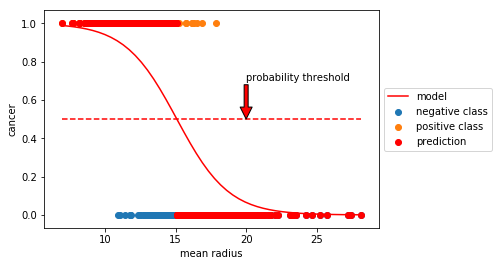

In [35]:
plt.scatter(X_1.iloc[y_1[y_1 == 0].index, :], y_1[y_1 == 0], label='negative class')
plt.scatter(X_1.iloc[y_1[y_1 == 1].index, :], y_1[y_1 == 1], label='positive class')
plt.scatter(X_1, predictions, c='r', label='prediction')
plt.plot(x_mod, y_mod, c='r', label='model')
plt.plot(x_mod, [0.5]*len(x_mod), c='r', linestyle='--')
plt.annotate('probability threshold', xy=(20, 0.5), xytext=(20, 0.7),
            arrowprops=dict(facecolor='red'))
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

#### Overall Accuracy

In [36]:
sum(predictions == y_1) / len(y_1)

0.8857644991212654

In [37]:
log_reg.score(X_1, y_1)

0.8857644991212654

#### Confusion Matrix

In [38]:
# true negatives
TN = sum((y_1 == 0) & (predictions == 0))
TN

158

In [39]:
# false positives
FP = sum((y_1 == 0) & (predictions == 1))
FP

54

In [40]:
# false negatives
FN = sum((y_1 == 1) & (predictions == 0))
FN

11

In [41]:
# true positives
TP = sum((y_1 == 1) & (predictions == 1))
TP

346

In [42]:
metrics.confusion_matrix(y_1, predictions)

array([[158,  54],
       [ 11, 346]])

#### Precision/Recall

In [43]:
# negative precision
TN / (TN + FN)

0.9349112426035503

In [44]:
# negative recall
TN / (TN + FP)

0.7452830188679245

In [45]:
# positive precision
TP / (TP + FP)

0.865

In [46]:
# positive recall
TP / (TP + FN)

0.969187675070028

In [47]:
print(metrics.classification_report(y_1, predictions))

             precision    recall  f1-score   support

          0       0.93      0.75      0.83       212
          1       0.86      0.97      0.91       357

avg / total       0.89      0.89      0.88       569



#### Receiver Operating Characteristic (ROC)

In [48]:
from sklearn.metrics import roc_curve

In [49]:
# false positive rate at 0.5 threshold
FP / (TP + FN)

0.15126050420168066

In [50]:
# true positive rate at 0.5 threshold
TP / (TP + FN)

0.969187675070028

In [51]:
# positive class ROC values for range of probability thresholds
fpr, tpr, thresh = roc_curve(y_1, predict_proba[:, 1])

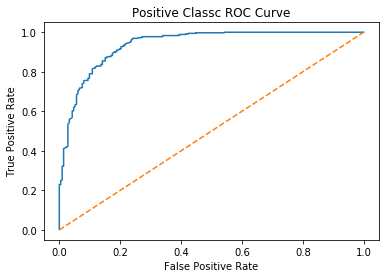

In [52]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Positive Classc ROC Curve');

#### ROC Score

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
# area under ROC curver
roc_auc_score(y_1, predict_proba[:, 1])

0.9375165160403784

#### Precision/Recall

In [55]:
from sklearn.metrics import precision_recall_curve

In [56]:
# positive precision at 0.5 threshold
TP / (TP + FP)

0.865

In [57]:
# positive recall at 0.5 threshold
TP / (TP + FN)

0.969187675070028

In [58]:
# positive class precision, recall for range of thresholds
pre, rec, thresh = precision_recall_curve(y_1, predict_proba[:, 1])

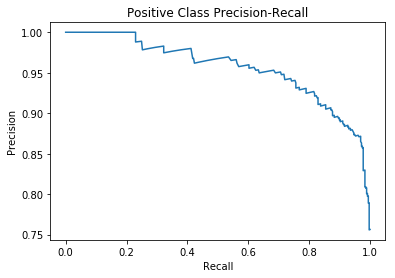

In [59]:
plt.plot(rec, pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Positive Class Precision-Recall');

#### Precision/Recall Score

In [60]:
from sklearn.metrics import auc

In [61]:
# area under precision-recall curve
auc(rec, pre)

0.9558133772530509

## Two-Feature Model <a name="mod_2"></a>

In [62]:
# create instance of model
log_reg = LogisticRegression()

In [63]:
# fit model on training data
log_reg.fit(X_2, y_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model Coefficients

In [64]:
# output model coefficients
log_reg.coef_

array([[-0.50702007, -0.05304933]])

In [65]:
# output model intercept
log_reg.intercept_

array([8.70624244])

In [66]:
# output model classes
log_reg.classes_

array([0, 1])

In [67]:
# features
X_2.columns

Index(['mean radius', 'mean texture'], dtype='object')

In [68]:
coefs = [log_reg.intercept_[0], log_reg.coef_[0][0], log_reg.coef_[0][1]]

In [69]:
feats = ['intercept', X_2.columns[0], X_2.columns[1]]

In [70]:
pd.DataFrame(coefs, index=feats, columns=['Model Coefficients'])

,Model Coefficients
intercept,8.706242
mean radius,-0.507020
mean texture,-0.053049


### Model Equation

In [71]:
print('Regression Model Equation')
print('-'*80)
print(f'y = {round(log_reg.coef_[0][0], 4)}*{X_2.columns[0]} \
+ {round(log_reg.coef_[0][1], 4)}*{X_2.columns[1]} \
+ {round(log_reg.intercept_[0], 2)}')
print('-'*80)

Regression Model Equation
--------------------------------------------------------------------------------
y = -0.507*mean radius + -0.053*mean texture + 8.71
--------------------------------------------------------------------------------


### Model Visualization

In [72]:
# calculate model values with logistic equation
x1_lim = np.linspace(min(X_2.iloc[:, 0]), max(X_2.iloc[:, 0]), 10)
x2_lim = np.linspace(min(X_2.iloc[:, 1]), max(X_2.iloc[:, 1]), 10)
X1, X2 = np.meshgrid(x1_lim, x2_lim)
Y = 1 / (1 + np.exp(-(log_reg.coef_[0][0]*X1 + log_reg.coef_[0][1]*X2 + log_reg.intercept_[0])))

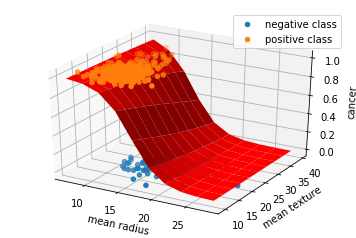

In [73]:
# uncomment for interactivity:
# %matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df_2.columns[-1])

ax.scatter3D(X_2.iloc[y_2[y_2 == 0].index, 0], X_2.iloc[y_2[y_2 == 0].index, 1], 
             y_2[y_2== 0], label='negative class')
ax.scatter3D(X_2.iloc[y_2[y_2 == 1].index, 0], X_2.iloc[y_2[y_2 == 1].index, 1], 
             y_2[y_2== 1], label='positive class')
ax.plot_surface(X1, X2, Y, color='red')
ax.legend();

### Model Predictions

In [74]:
# predict class based on feature input
predictions = log_reg.predict(X_2)
predictions

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [75]:
# predict probabilities of each class based on feature input
predict_proba = log_reg.predict_proba(X_2)
predict_proba

array([[0.72426171, 0.27573829],
       [0.93498102, 0.06501898],
       [0.91715317, 0.08284683],
       ...,
       [0.76850982, 0.23149018],
       [0.96423302, 0.03576698],
       [0.03017985, 0.96982015]])

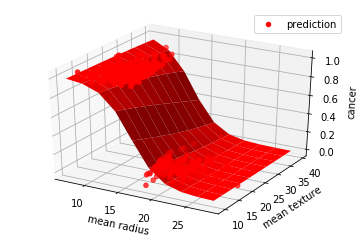

In [76]:
# uncomment for interactivity:
# %matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df_2.columns[-1])

ax.scatter3D(X_2.iloc[:, 0], X_2.iloc[:, 1], predictions, color='red', label='prediction')
ax.plot_surface(X1, X2, Y, color='red')
ax.legend();

### Model Evaluation

In [77]:
from sklearn import metrics

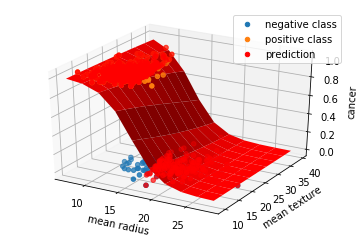

In [78]:
# uncomment for interactivity:
# %matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df_2.columns[-1])

ax.scatter3D(X_2.iloc[y_2[y_2 == 0].index, 0], X_2.iloc[y_2[y_2 == 0].index, 1], 
             y_2[y_2== 0], label='negative class')
ax.scatter3D(X_2.iloc[y_2[y_2 == 1].index, 0], X_2.iloc[y_2[y_2 == 1].index, 1], 
             y_2[y_2== 1], label='positive class')
ax.scatter3D(X_2.iloc[:, 0], X_2.iloc[:, 1], predictions, color='red', label='prediction')
ax.plot_surface(X1, X2, Y, color='red')
ax.legend();

In [79]:
%matplotlib inline

#### Overall Accuracy

In [80]:
sum(predictions == y_2) / len(y_2)

0.8927943760984183

In [81]:
log_reg.score(X_2, y_2)

0.8927943760984183

#### Confusion Matrix

In [82]:
# true negatives
TN = sum((y_2 == 0) & (predictions == 0))
TN

160

In [83]:
# false positives
FP = sum((y_2 == 0) & (predictions == 1))
FP

52

In [84]:
# false negatives
FN = sum((y_2 == 1) & (predictions == 0))
FN

9

In [85]:
# true positives
TP = sum((y_2 == 1) & (predictions == 1))
TP

348

In [86]:
metrics.confusion_matrix(y_2, predictions)

array([[160,  52],
       [  9, 348]])

#### Precision/Recall

In [87]:
# negative precision
TN / (TN + FN)

0.9467455621301775

In [88]:
# negative recall
TN / (TN + FP)

0.7547169811320755

In [89]:
# positive precision
TP / (TP + FP)

0.87

In [90]:
# positive recall
TP / (TP + FN)

0.9747899159663865

In [91]:
print(metrics.classification_report(y_2, predictions))

             precision    recall  f1-score   support

          0       0.95      0.75      0.84       212
          1       0.87      0.97      0.92       357

avg / total       0.90      0.89      0.89       569



#### Receiver Operating Characteristic (ROC)

In [92]:
from sklearn.metrics import roc_curve

In [93]:
# false positive rate at 0.5 threshold
FP / (TP + FN)

0.14565826330532214

In [94]:
# true positive rate at 0.5 threshold
TP / (TP + FN)

0.9747899159663865

In [95]:
# positive class ROC values for range of probability thresholds
fpr, tpr, thresh = roc_curve(y_2, predict_proba[:, 1])

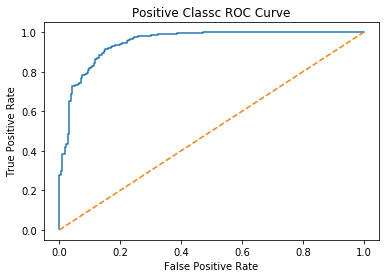

In [96]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Positive Classc ROC Curve');

#### ROC Score

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
# area under ROC curver
roc_auc_score(y_1, predict_proba[:, 1])

0.947954653559537

#### Precision/Recall

In [99]:
from sklearn.metrics import precision_recall_curve

In [100]:
# positive precision at 0.5 threshold
TP / (TP + FP)

0.87

In [101]:
# positive recall at 0.5 threshold
TP / (TP + FN)

0.9747899159663865

In [102]:
# positive class precision, recall for range of thresholds
pre, rec, thresh = precision_recall_curve(y_2, predict_proba[:, 1])

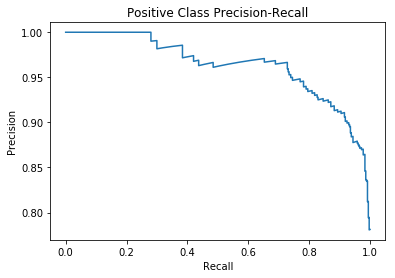

In [103]:
plt.plot(rec, pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Positive Class Precision-Recall');

#### Precision/Recall Score

In [104]:
from sklearn.metrics import auc

In [105]:
# area under precision-recall curve
auc(rec, pre)

0.9632377723707668

# Modeling <a name="model"></a>

## Train/Test Split <a name="tt_splt"></a>
Split data into feature training, feature test, target training and target test variables

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
# specify test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [108]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


In [109]:
y_train.head()

293    1
332    1
565    0
278    1
489    0
Name: cancer, dtype: int64

In [110]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


In [111]:
y_test.head()

512    0
457    1
439    1
298    1
37     1
Name: cancer, dtype: int64

## Initial Model <a name="init"></a>

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
# create instance of linear regression model
log_reg = LogisticRegression()

In [114]:
# fit model on training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
# overall model accuracy
log_reg.score(X_test, y_test)

0.958041958041958

In [116]:
# model predictions
log_reg_pred = log_reg.predict(X_test)

In [117]:
# confusion matrix
metrics.confusion_matrix(y_test, log_reg_pred)

array([[52,  1],
       [ 5, 85]])

In [118]:
# classification report
print(metrics.classification_report(y_test, log_reg_pred))

             precision    recall  f1-score   support

          0       0.91      0.98      0.95        53
          1       0.99      0.94      0.97        90

avg / total       0.96      0.96      0.96       143



In [119]:
# assign report output values
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, log_reg_pred)

# Tuning <a name="tune"></a>

## GridSearch <a name="grid"></a>

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
# penalty method
# l1: sum of absolute value of coefficients added to cost function
# l2: sum of squares of coefficients added to cost function
penalty_range = ['l1', 'l2']

In [122]:
# C
# lower C values penalize feature coefficients more
C_range = np.linspace(0.01, 5, 20)

In [123]:
# define hyperparameter dictionary
hyperparams = {'penalty': penalty_range, 'C': C_range}

In [124]:
# create instance of tuner
grid = GridSearchCV(log_reg, hyperparams, scoring='accuracy', cv=5)

In [125]:
# fit tuner to data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([0.01   , 0.27263, 0.53526, 0.79789, 1.06053, 1.32316, 1.58579,
       1.84842, 2.11105, 2.37368, 2.63632, 2.89895, 3.16158, 3.42421,
       3.68684, 3.94947, 4.21211, 4.47474, 4.73737, 5.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [126]:
# output parameters for optimal model
grid.best_params_

{'C': 1.0605263157894738, 'penalty': 'l1'}

In [127]:
# output optimal overall accuracy
grid.best_score_

0.9553990610328639

In [128]:
# create model with optimal hyperparameters
log_reg_tune = LogisticRegression(C=grid.best_params_['C'], penalty=grid.best_params_['penalty'])

In [129]:
# fit and score
log_reg_tune.fit(X_train, y_train)
log_reg_tune.score(X_test, y_test)

0.958041958041958

In [130]:
# model predictions
log_reg_pred = log_reg_tune.predict(X_test)

In [131]:
# confusion matrix
metrics.confusion_matrix(y_test, log_reg_pred)

array([[52,  1],
       [ 5, 85]])

In [132]:
# classification report
print(metrics.classification_report(y_test, log_reg_pred))

             precision    recall  f1-score   support

          0       0.91      0.98      0.95        53
          1       0.99      0.94      0.97        90

avg / total       0.96      0.96      0.96       143



### Within Pipeline

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [134]:
# set pipeline parameters
log_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

In [135]:
# fit model using pipeline parameters
log_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [136]:
# model predictions
log_reg_pred = log_reg_pipe.predict(X_test)

In [137]:
# classification report
print(metrics.classification_report(y_test, log_reg_pred))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        53
          1       0.97      0.97      0.97        90

avg / total       0.96      0.96      0.96       143



In [138]:
# define hyperparameter dictionary for pipeline input
hyperparams = {'model__penalty': penalty_range, 'model__C': C_range}

In [139]:
# tune model pipeline for recall
log_tune = GridSearchCV(log_reg_pipe, hyperparams, cv=5, scoring='accuracy')

In [140]:
log_tune.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'model__penalty': ['l1', 'l2'], 'model__C': array([0.01   , 0.27263, 0.53526, 0.79789, 1.06053, 1.32316, 1.58579,
       1.84842, 2.11105, 2.37368, 2.63632, 2.89895, 3.16158, 3.42421,
       3.68684, 3.94947, 4.21211, 4.47474, 4.73737, 5.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [141]:
# optimal parameters
log_tune.best_params_

{'model__C': 0.5352631578947369, 'model__penalty': 'l2'}

In [142]:
# assign best hyperparameter values within pipeline
log_reg_pipe.set_params(
    model__C=log_tune.best_params_['model__C'],
    model__penalty=log_tune.best_params_['model__penalty']
)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=0.5352631578947369, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [143]:
# fit model and return predictions
log_reg_pipe.fit(X_train, y_train)
log_reg_pred = log_reg_pipe.predict(X_test)

In [144]:
print(metrics.classification_report(y_test, log_reg_pred))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        53
          1       0.98      0.98      0.98        90

avg / total       0.97      0.97      0.97       143



# Feature Weights <a name="feat_wgt"></a>

In [145]:
log_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

log_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [146]:
# feature coefficients
log_reg_pipe.named_steps['model'].coef_

array([[-0.29707911, -0.58009367, -0.31014937, -0.37796983, -0.11900948,
         0.42874092, -0.71202253, -0.85413602, -0.46702832,  0.11587527,
        -1.38361211,  0.08992785, -0.9495839 , -0.94925816,  0.18489145,
         0.99327691,  0.11121725, -0.34433064,  0.20287033,  0.80423227,
        -0.91639854, -0.91711291, -0.81636283, -0.86771937, -0.45522601,
         0.10356522, -0.82960887, -0.98428664, -0.59213933, -0.61132772]])

In [147]:
# feature names
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [148]:
# create feature dataframe
feat_sort(log_reg_pipe.named_steps['model'].coef_[0], X.columns)

,feat_wgt,positive
radius error,1.383612,False
compactness error,0.993277,True
worst concave points,0.984287,False
perimeter error,0.949584,False
area error,0.949258,False
worst texture,0.917113,False
worst radius,0.916399,False
worst area,0.867719,False
mean concave points,0.854136,False
worst concavity,0.829609,False
